In [198]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [199]:
df = pd.read_csv('car_evaluation.csv')

In [200]:
df.shape

(1727, 7)

In [201]:
col_names = ['buying' , 'maint' , 'doors' , 'persons' , 'lug_boot' , 'safety' , 'class']

df.columns = col_names

In [202]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [203]:
for col in col_names:
    
    print(df[col].value_counts())   

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


Summary of variables

There are 7 variables in the dataset. All the variables are of categorical data type.
These are given by buying, maint, doors, persons, lug_boot, safety and class.
class is the target variable.


In [204]:
X = df.drop(['class'], axis=1)
y = df['class']

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [206]:
X_train.shape, X_test.shape

((1157, 6), (570, 6))

Encoding Categorical variables

In [207]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [208]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

Applying Decision Tree Model

In [209]:
from sklearn.tree import DecisionTreeClassifier 

clf_gini = DecisionTreeClassifier(criterion='gini' , max_depth=4,random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [210]:
y_pred_gini = clf_gini.predict(X_test)

Performance of the MODEL


In [211]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)*100))

Model accuracy score with criterion gini index: 84.9123


In [212]:
y_pred_train_gini = clf_gini.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8513


In [213]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 92  20  15   0]
 [  0  18   0   0]
 [ 24   1 374   0]
 [  6  20   0   0]]


In [214]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))


              precision    recall  f1-score   support

         acc       0.75      0.72      0.74       127
        good       0.31      1.00      0.47        18
       unacc       0.96      0.94      0.95       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.85       570
   macro avg       0.51      0.67      0.54       570
weighted avg       0.85      0.85      0.84       570



C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

Check for overfitting and underfitting

In [215]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8513
Test set score: 0.8491


Visualizing the Decision Tree

[Text(0.25, 0.9, 'x[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.125, 0.7, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.1875, 0.8, 'True  '),
 Text(0.375, 0.7, 'x[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3125, 0.8, '  False'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.5, 0.5, 'x[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.25, 0.3, 'x[1] <= 2.5\ngini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.125, 0.1, 'gini = 0.273\nsamples = 129\nvalue = [21, 0, 108, 0]'),
 Text(0.375, 0.1, 'gini = 0.373\nsamples = 137\nvalue = [103, 0, 34, 0]'),
 Text(0.75, 0.3, 'x[1] <= 2.5\ngini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]'),
 Text(0.625, 0.1, 'gini = 0.428\nsamples = 125\nvalue = [90, 0, 28, 7]'),
 Text(0.875, 0.1, 'gini = 0.688\nsamples = 133\nvalue = [43, 51, 7, 32]')]

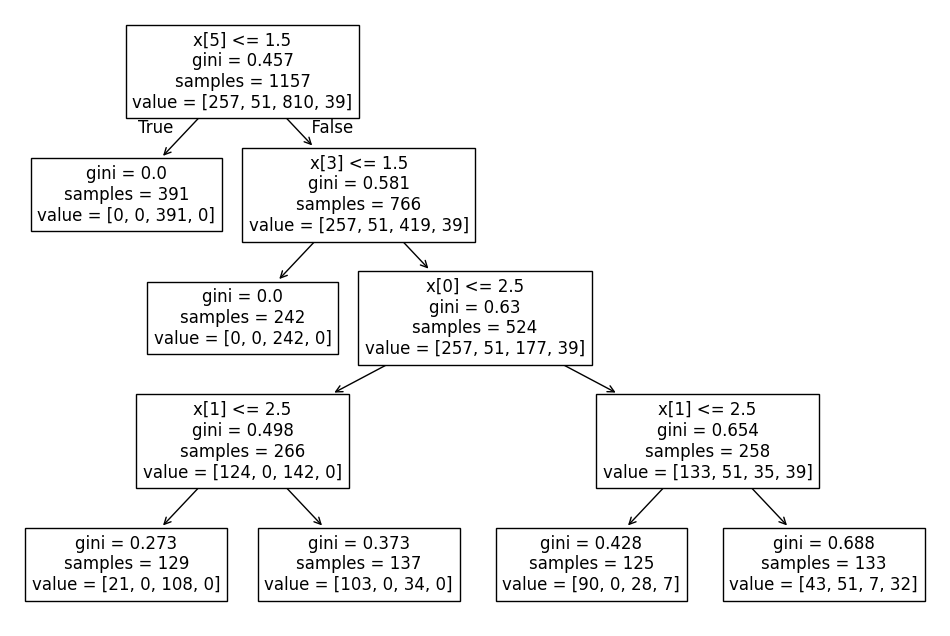

In [216]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 